# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [26]:
df = pd.read_csv('../ex00/am_pm.csv', parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     35 non-null     datetime64[ns]
 1   am       35 non-null     int64         
 2   pm       35 non-null     int64         
 3   target   35 non-null     bool          
 4   predict  35 non-null     bool          
dtypes: bool(2), datetime64[ns](1), int64(2)
memory usage: 1.0 KB


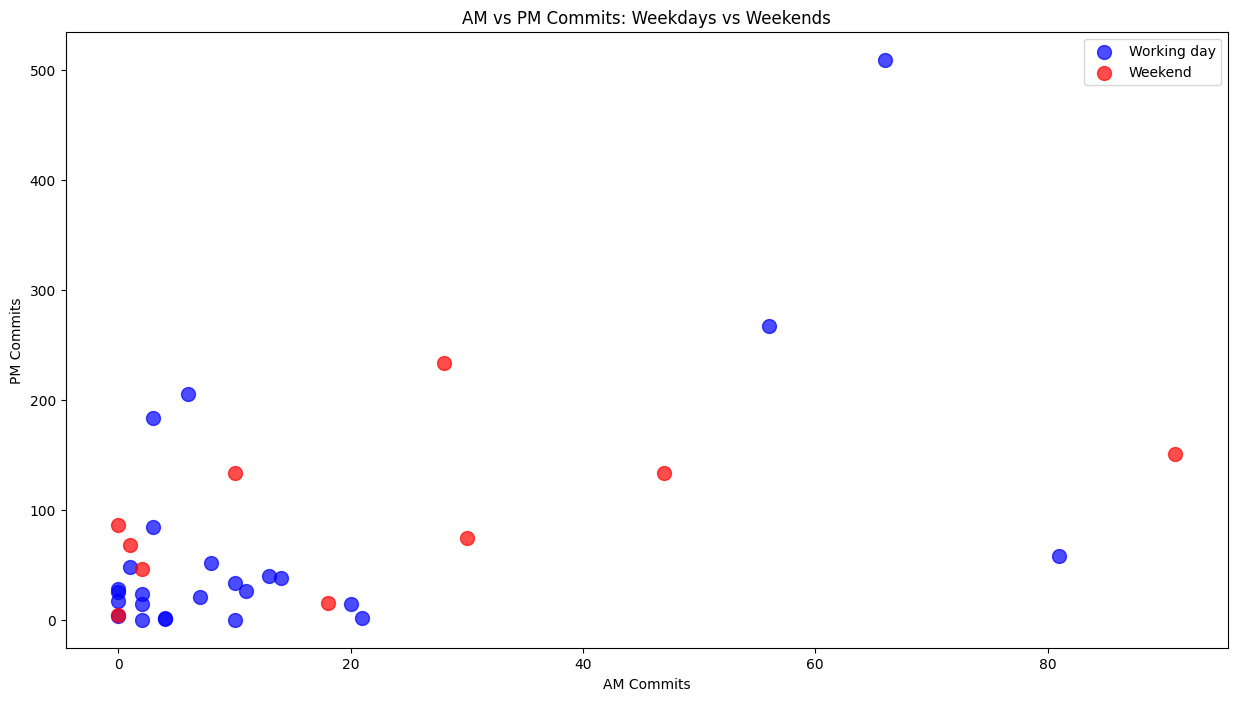

In [3]:
plt.figure(figsize=(15, 8))

for target, color, label in [(True, 'blue', 'Working day'), (False, 'red', 'Weekend')]:
    subset = df[df['target'] == target]
    plt.scatter(subset['am'], subset['pm'], color=color, label=label, s=100, alpha=0.7)

plt.xlabel('AM Commits')
plt.ylabel('PM Commits')
plt.title('AM vs PM Commits: Weekdays vs Weekends')
plt.legend()
plt.show()

In [4]:
model_coef_= [-0.00038653,  0.00298066]  # w1, w2 - значения с предыдущего задания
model_intercept_ = 0
w1, w2 = model_coef_
b = model_intercept_

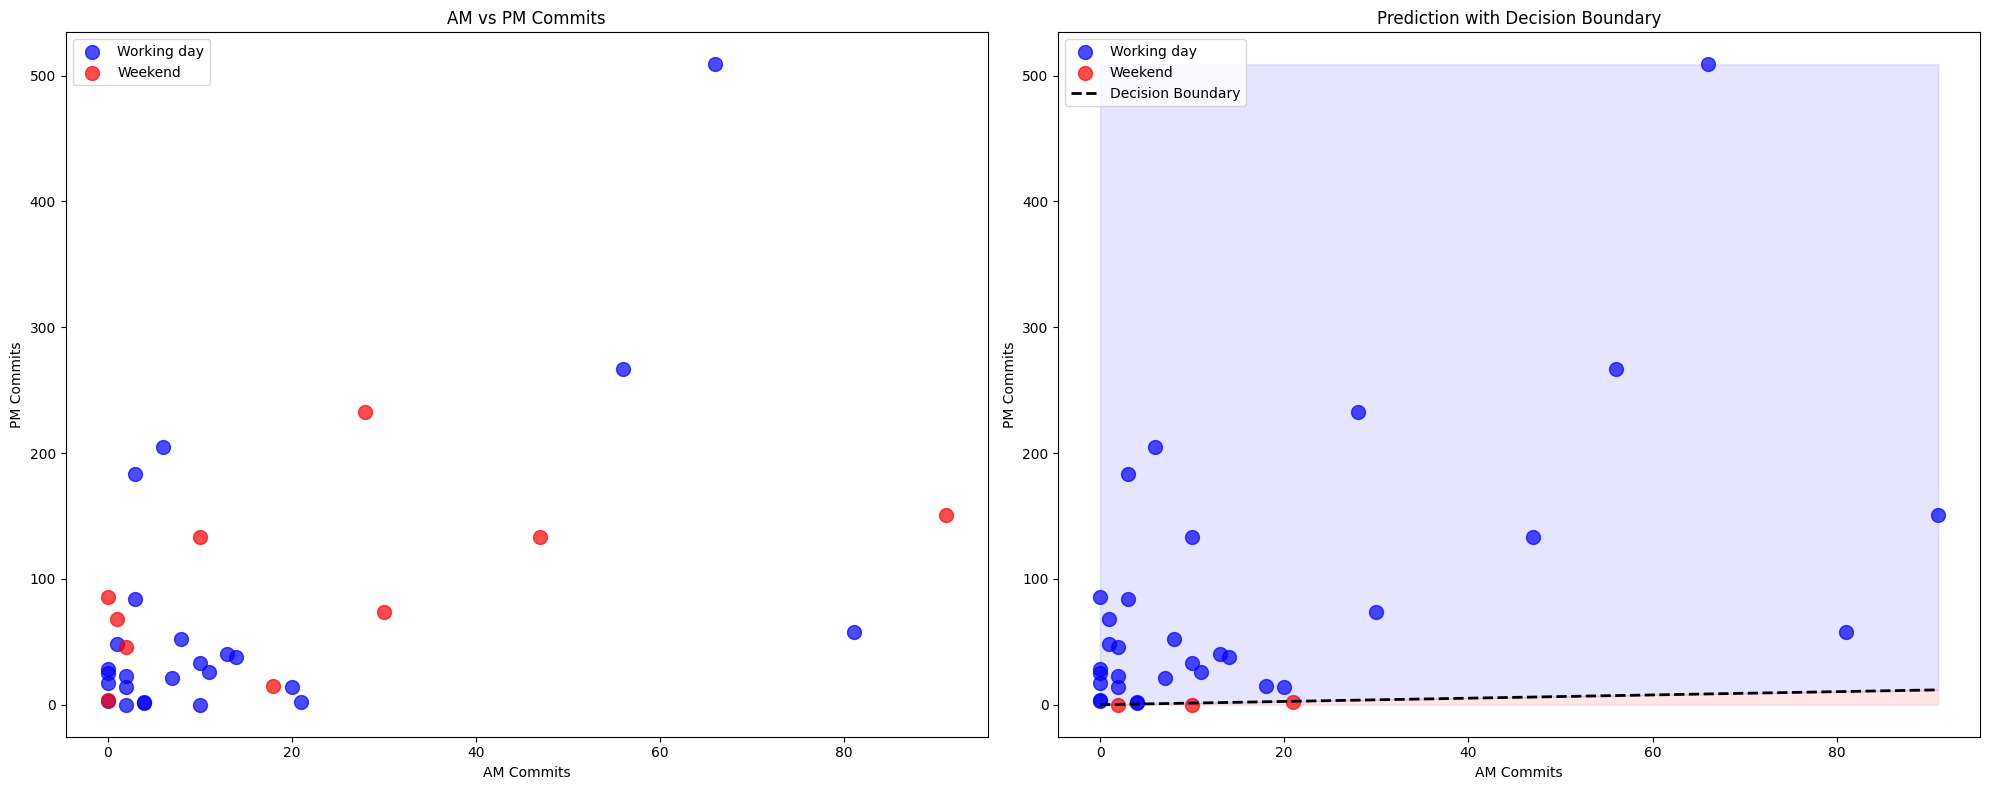

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# target
for target, color, label in [(True, 'blue', 'Working day'), (False, 'red', 'Weekend')]:
    subset = df[df['target'] == target]
    ax1.scatter(subset['am'], subset['pm'], color=color, label=label, s=100, alpha=0.7)
ax1.set_xlabel('AM Commits')
ax1.set_ylabel('PM Commits')
ax1.set_title('AM vs PM Commits')
ax1.legend(loc='upper left')

# predict + decision boundary
for predict, color, label in [(True, 'blue', 'Working day'), (False, 'red', 'Weekend')]:
    subset = df[df['predict'] == predict]
    ax2.scatter(subset['am'], subset['pm'], color=color, label=label, s=100, alpha=0.7)

x_values = np.linspace(df['am'].min(), df['am'].max(), 100)
y_values = (-w1 * x_values - b) / w2
ax2.plot(x_values, y_values, 'k--', linewidth=2, label='Decision Boundary')
ax2.fill_between(x_values, y_values, df['pm'].max(), color='blue', alpha=0.1)
ax2.fill_between(x_values, y_values, df['pm'].min(), color='red', alpha=0.1)

ax2.set_xlabel('AM Commits')
ax2.set_ylabel('PM Commits')
ax2.set_title('Prediction with Decision Boundary')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [6]:
#готовим датафрейм как в пред задании
df = pd.read_csv("../data/checker_timestamp.csv", parse_dates=["timestamp"])
df['date'] = df['timestamp'].dt.date
df['am'] = df['timestamp'].dt.hour < 12
df['pm'] = ~df['am']
df['target'] = df['timestamp'].dt.weekday
df = df.groupby('date').agg({'am':'sum', 'pm':'sum', 'target':'first'}).reset_index()
#df

In [7]:
X = df[['am', 'pm']]
df['target'] = df['target'] <= 4 
y = df['target']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#X_scaled

In [9]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model

LogisticRegression(fit_intercept=False, random_state=21)

In [10]:
model.fit(X_scaled, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [11]:
model.coef_, model.intercept_

(array([[-0.25392798, -0.07382947]]), array([0.]))

In [12]:
df['predict'] = model.predict(X_scaled)
#df

In [13]:
model_accuracy = accuracy_score(y, df['predict'])
model_accuracy

0.7428571428571429

In [14]:
naive_accuracy = max(y.mean(), 1 - y.mean())
naive_accuracy

0.7142857142857143

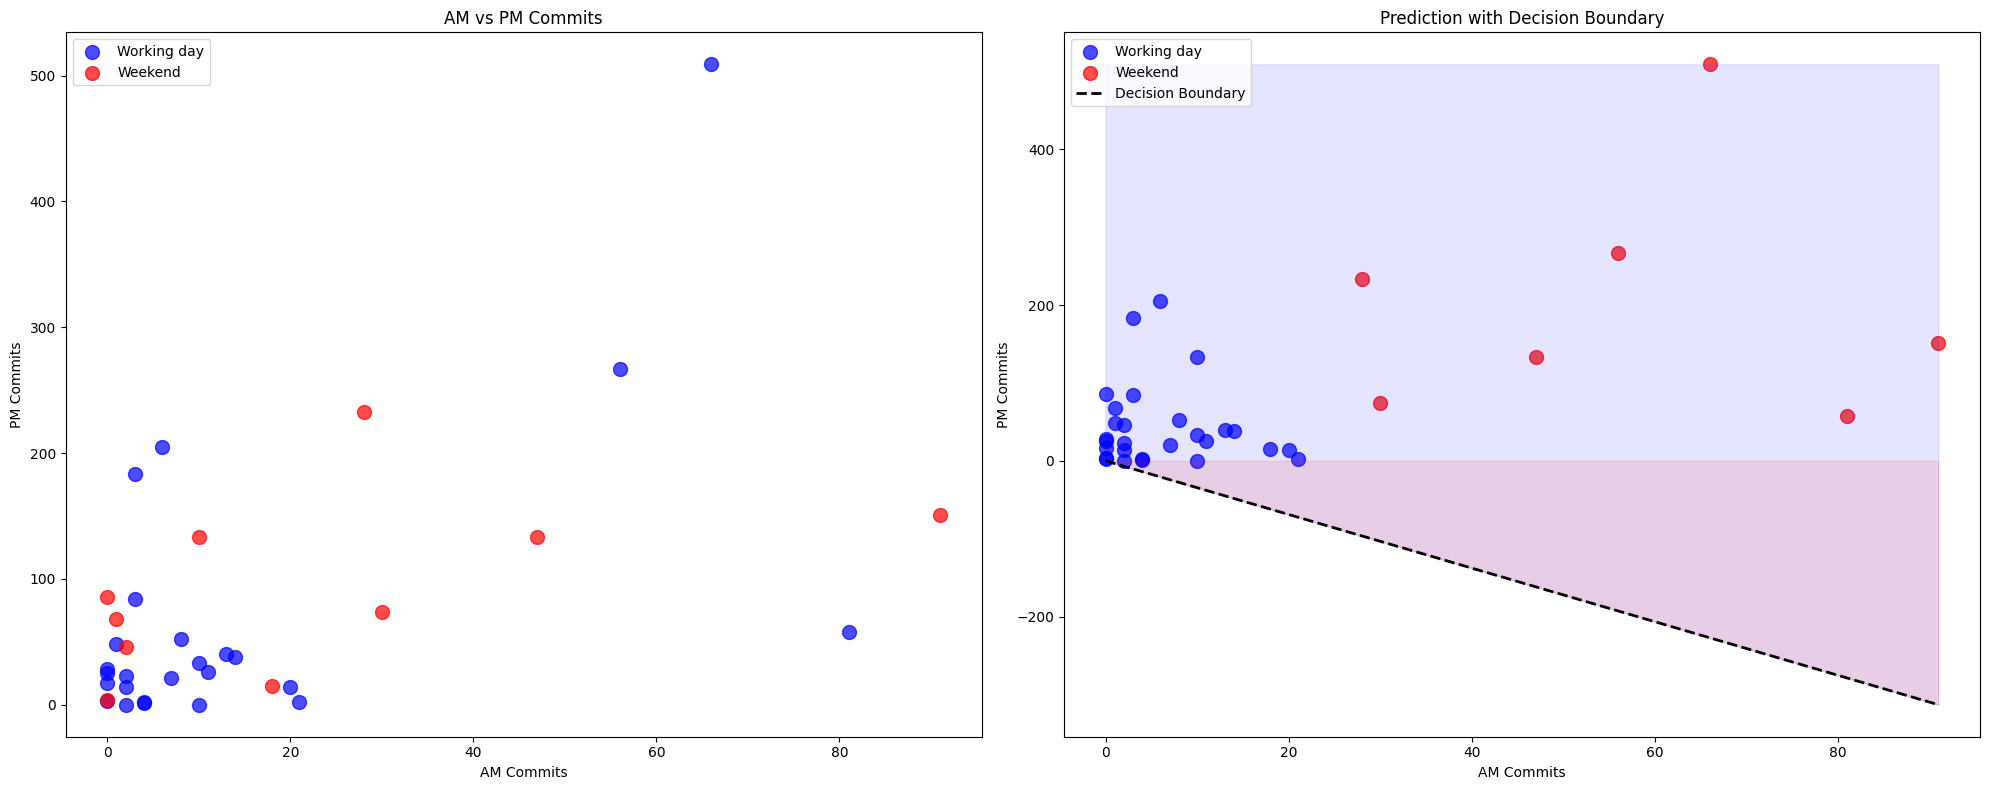

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# target
for target, color, label in [(True, 'blue', 'Working day'), (False, 'red', 'Weekend')]:
    subset = df[df['target'] == target]
    ax1.scatter(subset['am'], subset['pm'], color=color, label=label, s=100, alpha=0.7)
ax1.set_xlabel('AM Commits')
ax1.set_ylabel('PM Commits')
ax1.set_title('AM vs PM Commits')
ax1.legend(loc='upper left')


# predict + decision boundary
for predict, color, label in [(True, 'blue', 'Working day'), (False, 'red', 'Weekend')]:
    subset = df[df['predict'] == predict]
    ax2.scatter(subset['am'], subset['pm'], color=color, label=label, s=100, alpha=0.7)

model_coef_= [-0.25392798, -0.07382947] # w1, w2 - значения  выше
model_intercept_ = 0
w1, w2 = model_coef_
b = model_intercept_

x_values = np.linspace(df['am'].min(), df['am'].max(), 100)  ##  w1*am + w2*pm + b = 0
y_values = (-w1 * x_values - b) / w2

ax2.plot(x_values, y_values, 'k--', linewidth=2, label='Decision Boundary')
ax2.fill_between(x_values, y_values, df['pm'].max(), color='blue', alpha=0.1)
ax2.fill_between(x_values, y_values, df['pm'].min(), color='red', alpha=0.1)

ax2.set_xlabel('AM Commits')
ax2.set_ylabel('PM Commits')
ax2.set_title('Prediction with Decision Boundary')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [16]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_model = None
best_accuracy = 0

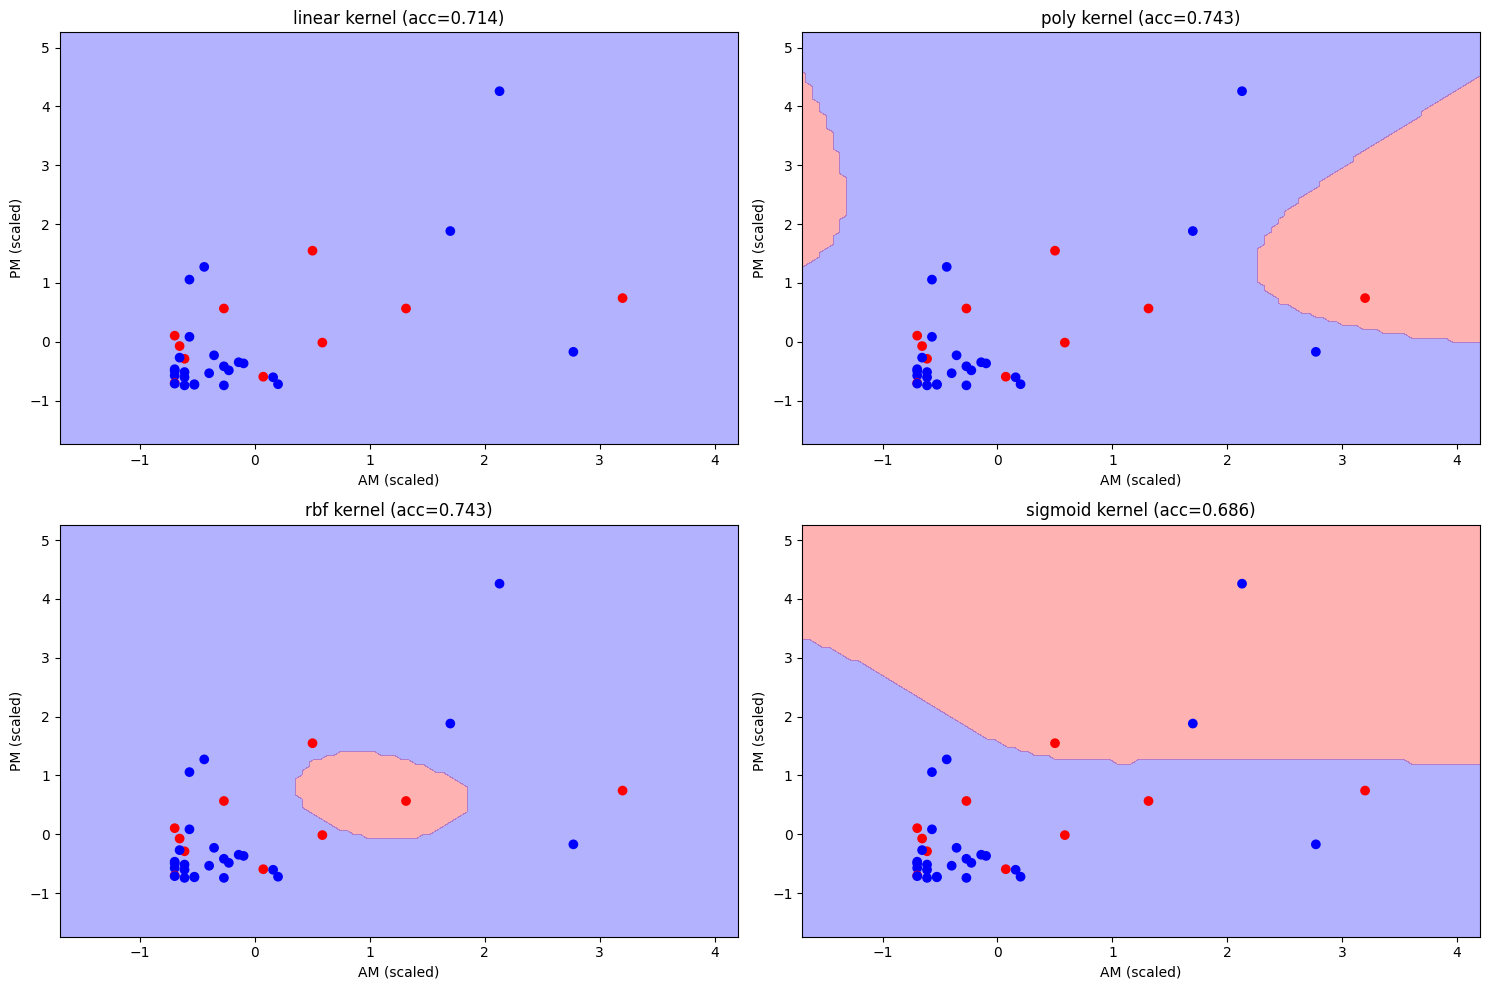

Best kernel: poly with accuracy: 0.7429


In [17]:
plt.figure(figsize=(15, 10))
colors = ['red', 'blue']
cmap_custom = ListedColormap(colors)

for i, kernel in enumerate(kernels):
    model = SVC(kernel=kernel, probability=True, random_state=21)
    model.fit(X_scaled, y)
    
    pred = model.predict(X_scaled)
    acc = accuracy_score(y, pred)
    
    if acc > best_accuracy:
        best_model = model
        best_accuracy = acc
    
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    flat_xx = xx.ravel()
    flat_yy = yy.ravel()
    grid_points = np.column_stack((flat_xx, flat_yy))
    predictions = model.predict(grid_points)
    Z = predictions.reshape(xx.shape)
    
    plt.subplot(2, 2, i+1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_custom)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_custom)
    plt.title(f'{kernel} kernel (acc={acc:.3f})')
    plt.xlabel('AM (scaled)')
    plt.ylabel('PM (scaled)')

plt.tight_layout()
plt.show()
print(f"Best kernel: {best_model.kernel} with accuracy: {best_accuracy:.4f}")

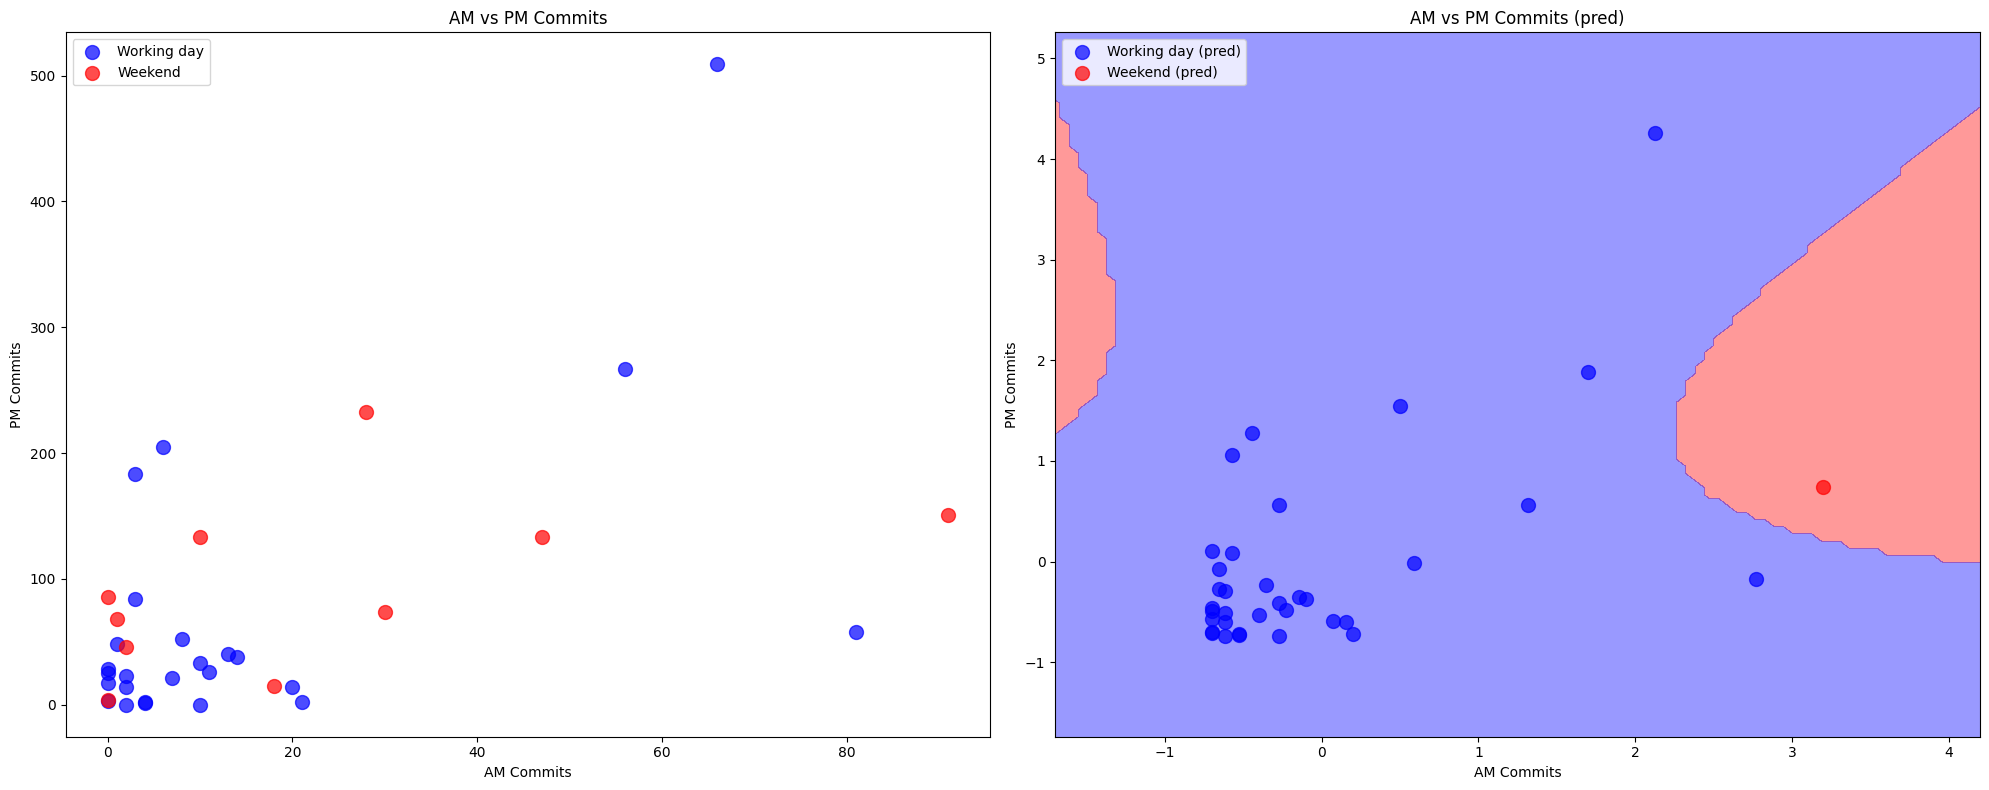

In [18]:
#сравниваем два графика с decision boundaries
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
colors = ['red', 'blue']
cmap_custom = ListedColormap(colors)

# target
for target, color, label in [(True, 'blue', 'Working day'), (False, 'red', 'Weekend')]:
    subset = df[df['target'] == target]
    ax1.scatter(subset['am'], subset['pm'], color=color, label=label, s=100, alpha=0.7)
ax1.set_xlabel('AM Commits')
ax1.set_ylabel('PM Commits')
ax1.set_title('AM vs PM Commits')
ax1.legend(loc='upper left')


# predict
model = SVC(kernel='poly', probability=True, random_state=21)
model.fit(X_scaled, y)
prediction = model.predict(X_scaled)

for pred, color, label in [(1, 'blue', 'Working day (pred)'), (0, 'red', 'Weekend (pred)')]:
    mask = (prediction == pred)
    ax2.scatter(X_scaled[mask, 0], X_scaled[mask, 1], color=color, label=label, s=100, alpha=0.7)

# + decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax2.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_custom)


ax2.set_xlabel('AM Commits')
ax2.set_ylabel('PM Commits')
ax2.set_title('AM vs PM Commits (pred)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [19]:
#X_scaled

In [20]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_scaled, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [21]:
y_pred = tree.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
accuracy

0.9428571428571428

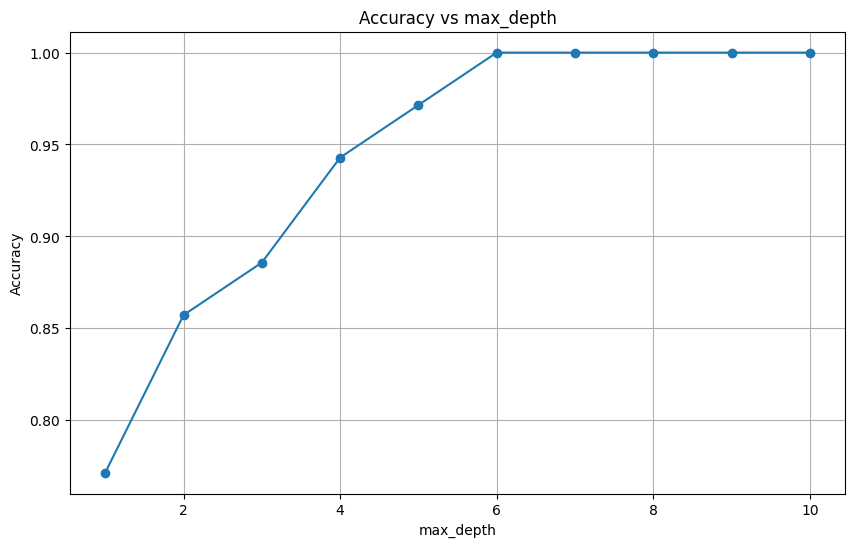

In [22]:
max_depths = range(1, 11)
accuracies = []

for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_scaled, y)
    y_pred = tree.predict(X_scaled)
    accuracies.append(accuracy_score(y, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracies, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth')
plt.grid()
plt.show()

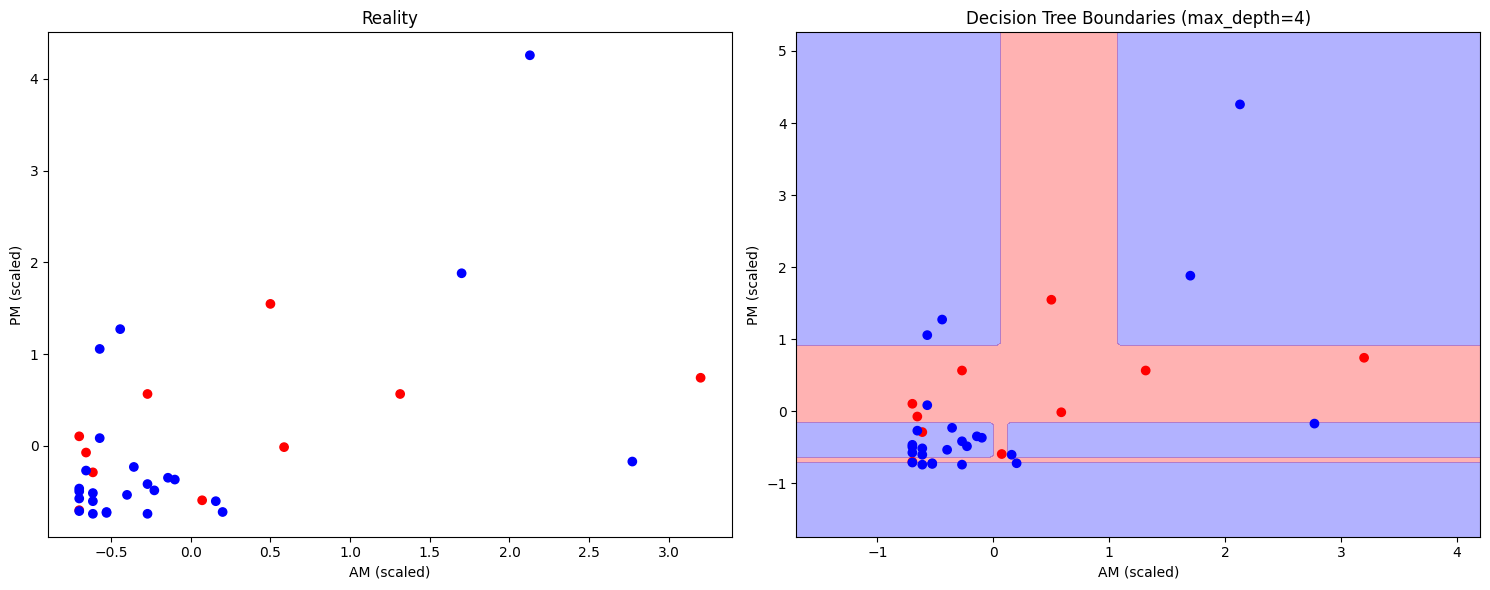

In [23]:
plt.figure(figsize=(15, 6))

# target
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=ListedColormap(['red', 'blue']))
plt.title('Reality')
plt.xlabel('AM (scaled)')
plt.ylabel('PM (scaled)')

# predict + decision boundary
plt.subplot(1, 2, 2)
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=ListedColormap(['red', 'blue']))
plt.title('Decision Tree Boundaries (max_depth=4)')
plt.xlabel('AM (scaled)')
plt.ylabel('PM (scaled)')

plt.tight_layout()
plt.show()

In [27]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_scaled, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

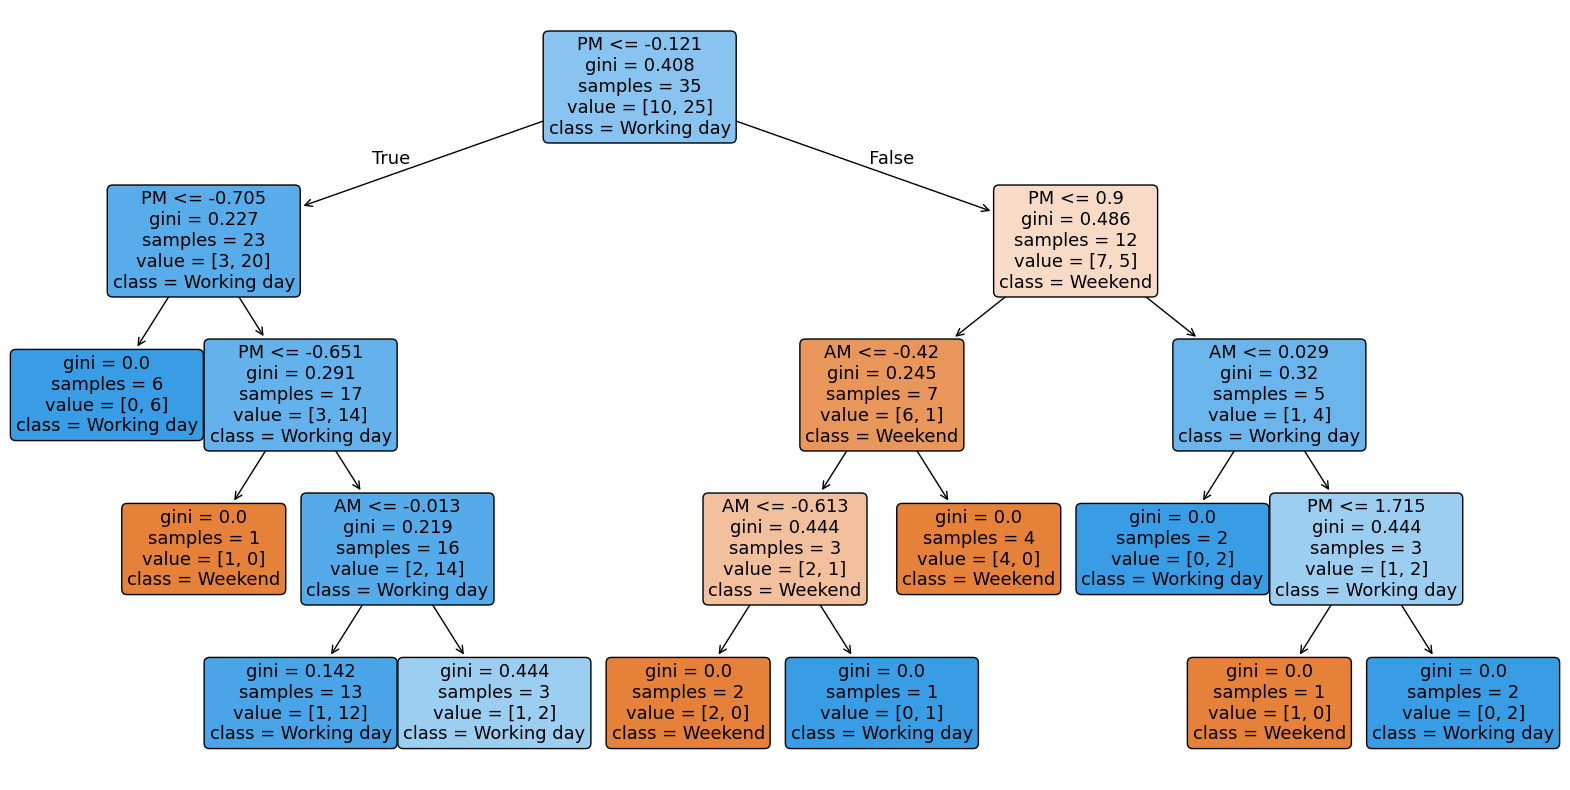

In [28]:
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=['AM', 'PM'], class_names=['Weekend', 'Working day'], rounded=True)
plt.show()

In [25]:
n_leaves = tree.get_n_leaves()
n_working_day_leaves = 0

# Get all leaf node values
tree_ = tree.tree_
feature = tree_.feature
threshold = tree_.threshold
value = tree_.value

for i in range(tree_.node_count):
    if feature[i] == -2:  # It's a leaf node
        if value[i][0][1] > value[i][0][0]:  # More working day samples
            n_working_day_leaves += 1

print(f"Total leaves: {n_leaves}")
print(f"Leaves labeling working days: {n_working_day_leaves}")

Total leaves: 13
Leaves labeling working days: 7


7